Mykola Kantarzhy 10.01.2025

# Example Dashboard

### 1 Horizontal bar chart

This example showcases a simple __horizontal bar__ chart.

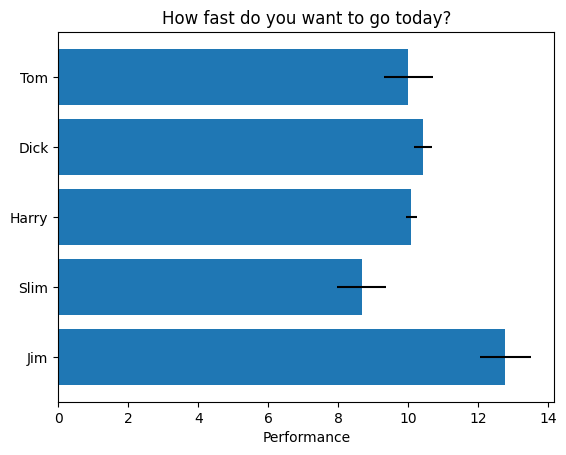

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

### 2 Contour image

Test combinations of __contouring__, __filled contouring__, and __image plotting__.

The emphasis in this demo is on showing how to make contours register correctly on images, and on how to get both of them oriented as desired. In particular, note the usage of the `"origin"` and `"extent"` keyword arguments to imshow and contour.

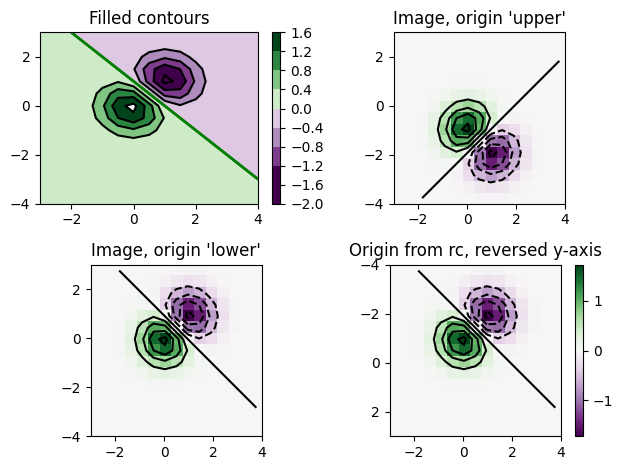

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

# Default delta is large because that makes it fast, and it illustrates
# the correct registration between image and contours.
delta = 0.5

extent = (-3, 4, -4, 3)

x = np.arange(-3.0, 4.001, delta)
y = np.arange(-4.0, 3.001, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Boost the upper limit to avoid truncation errors.
levels = np.arange(-2.0, 1.601, 0.4)

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
cmap = cm.PRGn

fig, _axs = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

cset1 = axs[0].contourf(X, Y, Z, levels, norm=norm,
                        cmap=cmap.resampled(len(levels) - 1))
# It is not necessary, but for the colormap, we need only the
# number of levels minus 1.  To avoid discretization error, use
# either this number or a large number such as the default (256).

# If we want lines as well as filled regions, we need to call
# contour separately; don't try to change the edgecolor or edgewidth
# of the polygons in the collections returned by contourf.
# Use levels output from previous call to guarantee they are the same.

cset2 = axs[0].contour(X, Y, Z, cset1.levels, colors='k')

# We don't really need dashed contour lines to indicate negative
# regions, so let's turn them off.
cset2.set_linestyle('solid')

# It is easier here to make a separate call to contour than
# to set up an array of colors and linewidths.
# We are making a thick green line as a zero contour.
# Specify the zero level as a tuple with only 0 in it.

cset3 = axs[0].contour(X, Y, Z, (0,), colors='g', linewidths=2)
axs[0].set_title('Filled contours')
fig.colorbar(cset1, ax=axs[0])


axs[1].imshow(Z, extent=extent, cmap=cmap, norm=norm)
axs[1].contour(Z, levels, colors='k', origin='upper', extent=extent)
axs[1].set_title("Image, origin 'upper'")

axs[2].imshow(Z, origin='lower', extent=extent, cmap=cmap, norm=norm)
axs[2].contour(Z, levels, colors='k', origin='lower', extent=extent)
axs[2].set_title("Image, origin 'lower'")

# We will use the interpolation "nearest" here to show the actual
# image pixels.
# Note that the contour lines don't extend to the edge of the box.
# This is intentional. The Z values are defined at the center of each
# image pixel (each color block on the following subplot), so the
# domain that is contoured does not extend beyond these pixel centers.
im = axs[3].imshow(Z, interpolation='nearest', extent=extent,
                   cmap=cmap, norm=norm)
axs[3].contour(Z, levels, colors='k', origin='image', extent=extent)
ylim = axs[3].get_ylim()
axs[3].set_ylim(ylim[::-1])
axs[3].set_title("Origin from rc, reversed y-axis")
fig.colorbar(im, ax=axs[3])

fig.tight_layout()
plt.show()

### 3 Multiple subplots

Simple demo with multiple subplots.

__subplots()__ is the recommended method to generate simple subplot arrangements

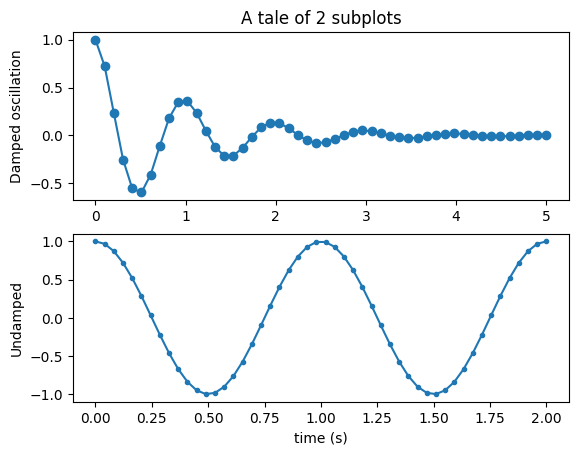

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create some fake data.
x1 = np.linspace(0.0, 5.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
x2 = np.linspace(0.0, 2.0)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

One more cell